In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-sentiment-classification/sample_submission.csv
/kaggle/input/edsa-sentiment-classification/train.csv
/kaggle/input/edsa-sentiment-classification/test.csv
/kaggle/input/climate-change-2022/test_with_no_labels.csv
/kaggle/input/climate-change-2022/train.csv


# EDSA - Climate Change Belief Analysis 2022
Predict an individual’s belief in climate change based on historical tweet data

Classifying Climate Change Tweets Utilizing NLP and classification techniques to categorize tweets as climate change believer or denier tweets

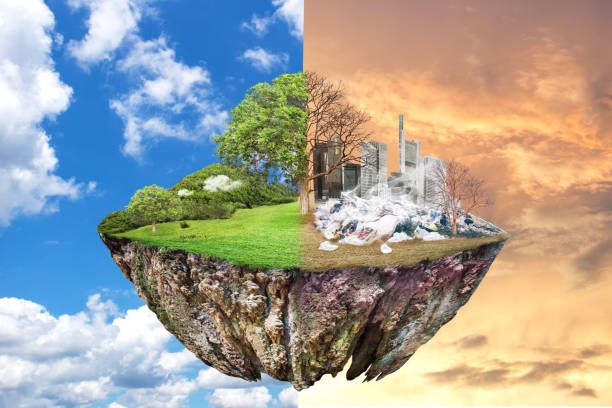!

# Table of Contents 
1. Introduction
2. Import Libraries
3. Uploading the Dataset 
4. Exploratory Data Analysis
5. Data Preprocessing
6. Modelling
7. Evaluation
8. Conclusion

# 1. Introduction
Many companies are built around lessening one’s environmental impact or carbon
footprint. They offer products and services that are environmentally friendly and
sustainable, in line with their values and ideals. They would like to determine how
people perceive climate change and whether or not they believe it is a real threat.
This would add to their market research efforts in gauging how their
product/service may be received.

This pedict is based on creating a Machine Learning model that is able to classify whether or not a
person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a
broad base of consumer sentiment, spanning multiple demographic and
geographic categories - thus increasing their insights and informing future
marketing strategies.

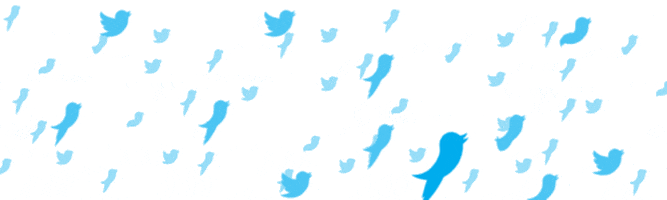

# 2. Import Libraries

STANDARD IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re

RELATIVE IMPORT LIBRARIES

In [3]:
# plotting
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

# nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

# sklearn(classifier)


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer



# Metrics/Evaluation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [4]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [5]:
!pip install wordcloud

In [6]:
!pip install imblearn

# 3.Uploading the Dataset

In [7]:
test = pd.read_csv('../input/climate-change-2022/test_with_no_labels.csv')
train = pd.read_csv('../input/climate-change-2022/train.csv')

In [8]:
# First 5 rows of the train dataset.

train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [9]:
# First 5 rows of the test data.

test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


There is a total of 15819 tweets in the train dataset. All the columns in the dataset have no null values. Sentiment and tweetid columns consist of integer values, whereas message column is of object data type.

In [11]:
# This code looks at how many words there are in each tweet message.

train['token_length'] = [len(x.split(" ")) for x in train.message]
train 

,sentiment,message,tweetid,token_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22
15815,2,RT @washingtonpost: How climate change could b...,17856,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,20


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


# 4. Exploratory Data Analysis

Below we breakdown the columns in the datasets:

1.tweetid — the id of the tweet message on Twitter

2.essage — the tweet messages for each tweetid

3.sentiment — the sentiment of the tweet messages from 2, 1, 0, and -1.

The train dataset contains three columns which are sentiment, tweet message and tweetid while the test dataset contains the tweet message and the tweetid column. The sentiment column has four classes which are represented by four numbers 2, 1, 0 and -1.

a) 2 News The tweet links to factual news about climate change

b) 1 Pro The tweet supports the belief of man-made climate change

c) 0 Neutral The tweet neither supports nor refutes the belief of man-made climate change

d)-1 Anti The tweet does not believe in man-made climate change



# Finding punctuation marks

In [13]:
def find_punct(string):
    
    """  
    This function takes in a string and finds punctuation marks. Thereafter, 
    it returns a list of the string of punctuation marks  
    """
    
    line = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', string)
    string="".join(line)
    return list(string)


# New Features with punctuation and punctuation length.

In [14]:


train['message']=train['message'].str.lower()   # change message text to lowercase
train['message_punct']=train['message'].apply(lambda x:find_punct(x))
train['message_punct_len']=train['message'].apply(lambda x:len(find_punct(x)))

train

,sentiment,message,tweetid,token_length,message_punct,message_punct_len
0,1,polyscimajor epa chief doesn't think carbon di...,625221,19,"[', ., ., ,, !, ?, :, /, /, ., /, @]",12
1,1,it's not like we lack evidence of anthropogeni...,126103,10,['],1
2,2,rt @rawstory: researchers say we have three ye...,698562,19,"[@, :, :, /, /, ., /, :, /, /, ., /]",12
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,15,"[#, #, :, :, /, /, ., /]",8
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,18,"[@, :, ', ,, ,, ,, ., #]",8
...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,22,"[@, :, ,, ,, ., ', ', ., :, /, /]",11
15815,2,rt @washingtonpost: how climate change could b...,17856,13,"[@, :, -, -, -, :, /, /, ., /]",10
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,19,"[:, :, :, ?, :, /, /, ., /]",9
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,20,"[@, :, #, .]",4


# The distribution of tweets messages over the classes

In [15]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

# Message Distribution over the classes.

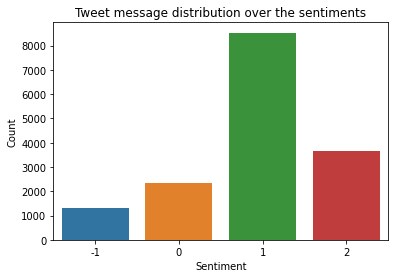

<Figure size 432x288 with 0 Axes>

In [16]:
dist_class = train['sentiment'].value_counts()
labels = ['1', '2','0','-1']
sns.color_palette('rainbow')

# Bar graph plot.

sns.barplot(x=dist_class.index, y=dist_class, data = train).set_title("Tweet message distribution over the sentiments")
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()
plt.savefig('Tweet message distribution over the sentiments.png')

Text(0.5, 1.0, 'Tweet message distribution over the sentiments')

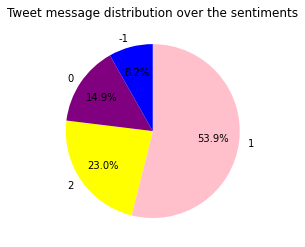

In [17]:
# Pie chart plot.

colors = ['pink', 'yellow', 'purple', 'blue']
plt.pie(dist_class,
        labels=labels,
        colors = colors,
        counterclock=False,
        startangle=90,
        autopct='%1.1f%%',
        pctdistance=0.7)
plt.title("Tweet message distribution over the sentiments")

# The visualisations above indicate :

There are 8530 tweet messages on count that support the belief of man-made climate change(sentiment: 1), which is 53.9%

There are 1296 tweet messages on count that do not believe in man-made climate change(sentiment: -1), which is 8.2%.

There are 2353 tweet messages on count where the tweet message neither supports or refutes the belief of man-made climate change(sentiment: 0), which is 14.9%.

There are also 3640 tweet messages on count which link factual news about climate change, and gives about 23.0% We then conlude that the distribution of tweets messages are unevenly distributed in the four given classes.

This tells us the classes are imbalanced, and this may affect the accuracy of the models.

The imbalance of the classes can be solved by the method called resampling (Downscaling and Upscaling) which involves modifying the number of observations in each class.

# The distribution of URL per sentiments

In [18]:
# Convert message characters to lowercase.

train['target']=train['message'].str.lower()

In [19]:
# Find URL's.

def find_link(string):
    
    """ 
    This function takes in a string and returns a joint string with 
    values which are part of url's.  
    """
    
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string)
    return "".join(url) 

In [20]:
# Creating a new df which shows url count of the respective sentiments.

train['target_url']=train['target'].apply(lambda x: find_link(x))
df=pd.DataFrame(train.loc[train['target_url']!=""]['sentiment'].value_counts()).reset_index()
df.rename(columns={"index": "sentiment", "sentiment": "url_count"})

,sentiment,url_count
0,1,3789
1,2,3199
2,0,794
3,-1,513


# Word Cloud
Word Clouds from pre-processed data for News, Pro, Neutral and Anti tweet messages from our train dataset and display words that occur the most.

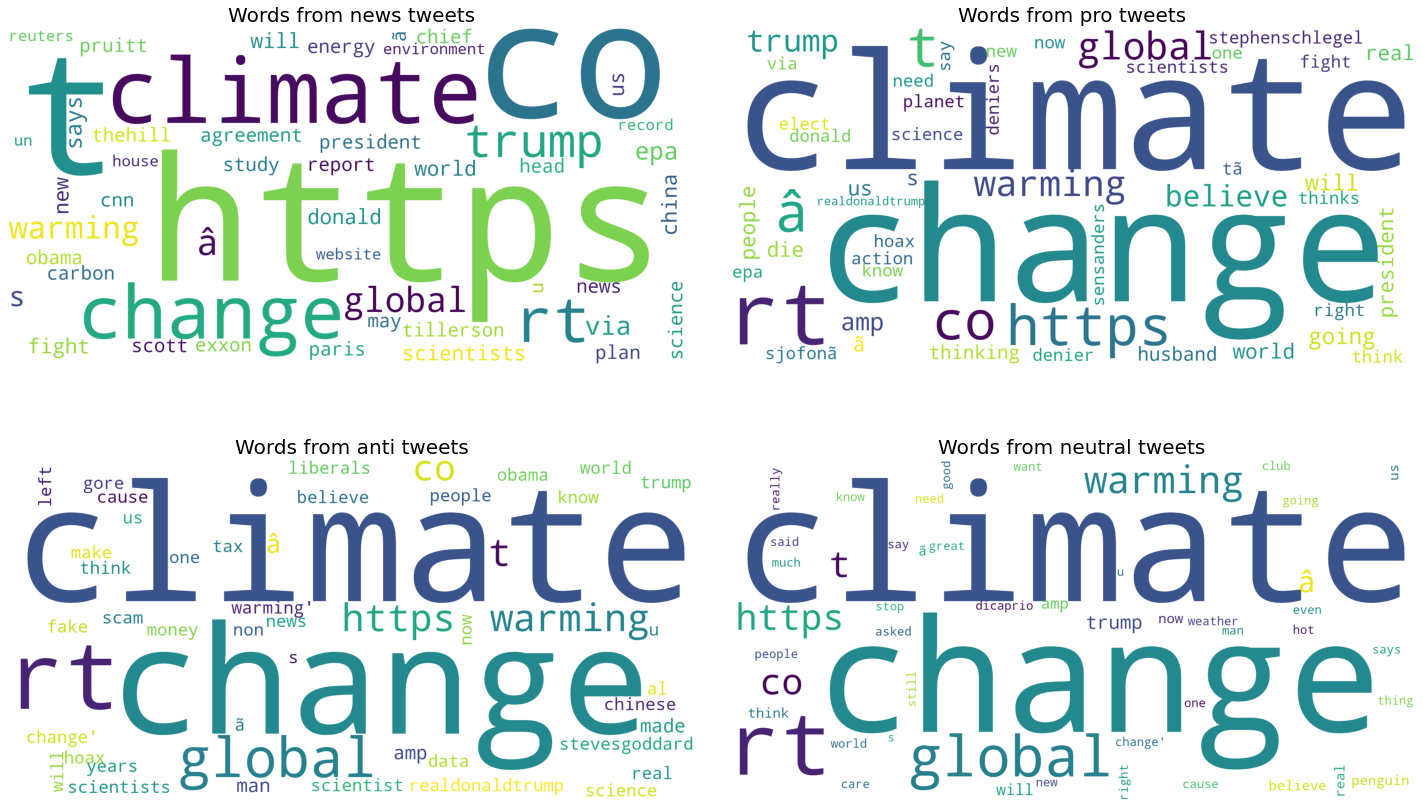

In [21]:
# Plotting word clouds.

news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))

# fig.suptitle('Clouds of polar words', fontsize = 30)

fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Words from news tweets', fontsize = 20)
axs[0, 0].axis('off')

# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Words from pro tweets', fontsize = 20)
axs[0, 1].axis('off')

# axs[0, 1].tight_layout(pad = 1)


# axs[1, 0].tight_layout(pad = 1)

axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Words from anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

# axs[1, 0].tight_layout(pad = 1)

plt.savefig('joint_cloud.png')

The Climate Change words seems to be the most frequently used word in all the tweet classes. This implies that both classes are tweeting about the Climate Change since it is the main topic.

# Word frequency analysis 

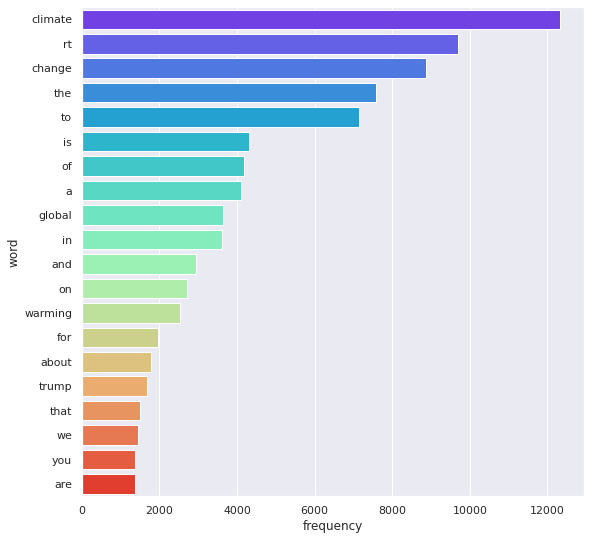

In [22]:
# Counting frequently used words. 
from collections import Counter 
word_list = [word for line in train['message']  for word in line.split()]
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Visualising on a barplot.

fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="rainbow")
plt.savefig('wordcount_bar.png')

# 5. Data Preprocessing
The following steps were performed for both the train and the test dataset.

a) Checking for nulls

b) Checking for blank strings

c) Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

d) Converting text to Lower Case

e) Removing Stopwords: Stopwords are the English words which do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

f) Lemmatizing: Lemmatization is the process of converting a word to its base form.

In [23]:
# Checking for Nulls in the train dataframe.

train.isnull().sum()

sentiment            0
message              0
tweetid              0
token_length         0
message_punct        0
message_punct_len    0
target               0
target_url           0
dtype: int64

In [24]:
# Checking Nulls in the test dataframe.

test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [25]:
# Checking for blanks in the train dataframe.

blanks = []                          # start with an empty list
for i,mes,twe in test.itertuples():  # iterate over the DataFrame
    if type(mes)==str:               # avoid NaN values
        if mes.isspace():            # test 'review' for whitespace
            blanks.append(i)         # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [26]:
# Replacing the website url's with the word 'url'.

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)
test['message'] = test['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)

In [27]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    
    """ 
    Function that takesin text and cleans it by removing stop words
    and lemmatizing it. 
    """
    text = re.sub('<[^<]+?>','', text)
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

train['Processed_message'] = train.message.apply(lambda x: clean_text(x))

test['Processed_message'] = test.message.apply(lambda x: clean_text(x))

In [28]:

# Checking the preprocessed train dataframe.

train.head()

,sentiment,message,tweetid,token_length,message_punct,message_punct_len,target,target_url,Processed_message
0,1,polyscimajor epa chief doesn't think carbon di...,625221,19,"[', ., ., ,, !, ?, :, /, /, ., /, @]",12,polyscimajor epa chief doesn't think carbon di...,https://t.co/yelvcefxkc,polyscimajor epa chief doesnt think carbon dio...
1,1,it's not like we lack evidence of anthropogeni...,126103,10,['],1,it's not like we lack evidence of anthropogeni...,,like lack evidence anthropogenic global warm
2,2,rt @rawstory: researchers say we have three ye...,698562,19,"[@, :, :, /, /, ., /, :, /, /, ., /]",12,rt @rawstory: researchers say we have three ye...,https://t.co/wdt0kdur2fhttps://t.co/z0anpt,rt rawstory researcher say three year act clim...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,15,"[#, #, :, :, /, /, ., /]",8,#todayinmaker# wired : 2016 was a pivotal year...,https://t.co/44wotxtlcd,todayinmaker wire 2016 wa pivotal year war cl...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,18,"[@, :, ', ,, ,, ,, ., #]",8,"rt @soynoviodetodas: it's 2016, and a racist, ...",,rt soynoviodetodas 2016 racist sexist climate ...


# 6. Modelling
This Section uses machine-learning technique and features to construct a classifier that can identify text/messages that expresses sentiment.

# Defining variables

In [29]:
# Independent feature of the train dataframe.

X=train['Processed_message']

# Dependent feature of the train dataframe.

y=train['sentiment'] 

# Independent feature of test dataframe.

x_unseen=test['Processed_message']   # test independent feature

# Splitting the dataset
The Preprocessed Data is divided into 2 sets of data:

Training Data: The dataset upon which the model would be trained on. Contains 90% data.

Test Data: The dataset upon which the model would be tested against. Contains 10% data.

In [30]:
# Splitting the train dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model fitting
**TF-IDF** indicates what the importance of the word is in order to understand the dataset.

**TF-IDF Vectoriser** converts a collection of raw documents to a matrix of TF-IDF features.

**ngram_range** : is the range of number of words in a sequence.

**max_df** : Used for removing data values that appear too frequently.

**min_df** : Used for removing terms that appear too infrequently.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectoriser = TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))

In [32]:
vectoriser.fit(x_unseen)

TfidfVectorizer(max_df=0.9, ngram_range=(1, 2), stop_words='english')

In [33]:
# Fitting the vectoriser.

vectoriser.fit(X_train, y_train) 

TfidfVectorizer(max_df=0.9, ngram_range=(1, 2), stop_words='english')

Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This dataset will be used to train the model and test against it.

In [34]:

# Transformation of the datasets.

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
x_unseen = vectoriser.transform(x_unseen)

# Below are the models used to train and test the data:

* Logistic Regression

* Linear SVC

* Multinomial Naive Bayes

* Support Vector Machine

* KNeighbors Classifier

# Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()

# Fitting the model using the train dataset.

LogisticRegression = LogisticRegression.fit(X_train, y_train)

In [36]:
from sklearn import metrics
# Getting predicions from the X_test

pred = LogisticRegression.predict(X_test)

# Printing the classification report

print(metrics.classification_report(y_test,pred))

# Print the overall accuracy

print(metrics.accuracy_score(y_test,pred))

              precision    recall  f1-score   support

          -1       0.80      0.35      0.49       126
           0       0.68      0.33      0.45       224
           1       0.76      0.89      0.82       895
           2       0.73      0.80      0.76       337

    accuracy                           0.75      1582
   macro avg       0.74      0.59      0.63      1582
weighted avg       0.74      0.75      0.73      1582

0.7458912768647282


# Linear SVC Model

In [37]:
LinearSVC = LinearSVC()

# Fitting the model with train dataset.

LinearSVC = LinearSVC.fit(X_train, y_train)

In [38]:

# Getting predicions from the X_test.

pred1 = LinearSVC.predict(X_test)

# Printing the classification report.

print(metrics.classification_report(y_test, pred1))

# Print the overall accuracy.

print(metrics.accuracy_score(y_test,pred1))

              precision    recall  f1-score   support

          -1       0.70      0.50      0.58       126
           0       0.66      0.38      0.48       224
           1       0.79      0.87      0.83       895
           2       0.75      0.83      0.79       337

    accuracy                           0.76      1582
   macro avg       0.72      0.65      0.67      1582
weighted avg       0.75      0.76      0.75      1582

0.7629582806573957


# Support Vector Machine Model

In [39]:

from sklearn.svm import SVC
SVC = SVC()

# Fitting the model with train dataset.

SVC = SVC.fit(X_train, y_train)

In [40]:
# Getting predictions from the X_test.

pred2 = SVC.predict(X_test)

# Pritting the classification report.

print(metrics.classification_report(y_test,pred2))

# Print the overall accuracy.

print(metrics.accuracy_score(y_test,pred2))

              precision    recall  f1-score   support

          -1       0.89      0.32      0.47       126
           0       0.79      0.29      0.43       224
           1       0.73      0.91      0.81       895
           2       0.76      0.78      0.77       337

    accuracy                           0.75      1582
   macro avg       0.79      0.58      0.62      1582
weighted avg       0.76      0.75      0.72      1582

0.7484197218710493


# Multinominal Naive Bayes Model

In [41]:
MultinomialNB = MultinomialNB()

# Fitting the model with train dataset.

MultinomialNB  = MultinomialNB .fit(X_train, y_train)

In [42]:
# Getting predictions from the X_test.

pred3 = MultinomialNB.predict(X_test)

# Printing the classification report.

print(metrics.classification_report(y_test,pred3))

# Print the overall accuracy.

print(metrics.accuracy_score(y_test,pred3))

              precision    recall  f1-score   support

          -1       1.00      0.04      0.08       126
           0       1.00      0.03      0.06       224
           1       0.63      0.99      0.77       895
           2       0.92      0.45      0.60       337

    accuracy                           0.66      1582
   macro avg       0.89      0.38      0.38      1582
weighted avg       0.77      0.66      0.58      1582

0.661188369152971


# KNN (K Nearest Neighbors)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()

# Fitting the model with train dataset.

KNeighborsClassifier  = KNeighborsClassifier.fit(X_train, y_train)

In [44]:
# Getting predictions from the X_test.

pred4 =KNeighborsClassifier.predict(X_test)

# Printing the classification report.

print(metrics.classification_report(y_test,pred4))

# Print the overall accuracy.

print(metrics.accuracy_score(y_test,pred4))

              precision    recall  f1-score   support

          -1       0.53      0.44      0.48       126
           0       0.47      0.42      0.45       224
           1       0.76      0.76      0.76       895
           2       0.61      0.67      0.64       337

    accuracy                           0.67      1582
   macro avg       0.59      0.58      0.58      1582
weighted avg       0.67      0.67      0.67      1582

0.6713021491782554


# 7. Evaluation
As a classification problem, Sentiment Analysis uses the evaluation metrics of Precision, Recall, F-score, and Accuracy. Also, average measures like macro, micro, and weighted F1-scores are useful for multi-class problems.

# Predictions based on all the models fitted

In [45]:
# Getting the predicted sentiment from test dataset.

y_pred = LinearSVC.predict(X_test)
y_pred1 = SVC.predict(X_test)
y_pred2 = LogisticRegression.predict(X_test)
y_pred3 = MultinomialNB.predict(X_test)
y_pred4 = KNeighborsClassifier.predict(X_test)

The F1 score is our main metric that we use to decide on the best model to use. Below is a dataframe that shows the models with their respective F1 scores from the largest score (i.e best model) to the lowest (i.e poor model).

In [46]:
F1_dict = {'Model':['Logistic Regression','Naïve Bayes','Linear SVC','SVC','KNN'],
           'F1 score' :[f1_score(y_test, y_pred2, average='weighted'),
                        f1_score(y_test, y_pred3, average='weighted'),
                        f1_score(y_test, y_pred, average='weighted'),
                        f1_score(y_test, y_pred1, average='weighted'),
                        f1_score(y_test, y_pred4, average='weighted'),
                        ],}
  


F1_score = pd.DataFrame(data=F1_dict, columns=['Model','F1 score'])
F1_score.set_index('Model',inplace = True)
F1_score.sort_values("F1 score", ascending = False, inplace=True)
F1_score

,F1 score
Model,
Linear SVC,0.750608
Logistic Regression,0.725872
SVC,0.722638
KNN,0.668741
Naïve Bayes,0.577203


Box Plot below showing the best performing model based on the F1 Scores tables

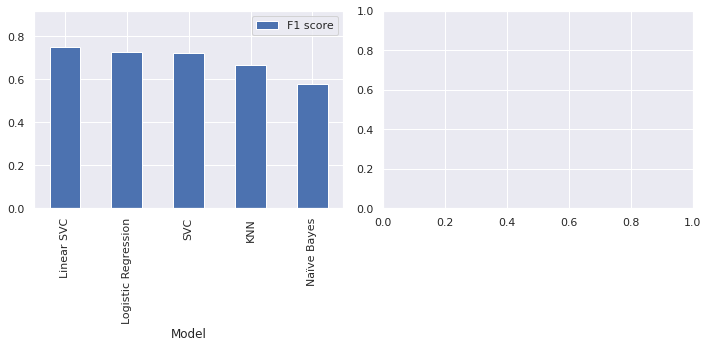

In [47]:
plot13, ax = plt.subplots(1, 2, figsize=(10, 5))
F1_score.plot(y=['F1 score'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.0,0.92],)

plt.tight_layout()
plt.show()

# 8. Conclusion
Based on the accuracy scores from the five fitted models above, LinearSCV is the one which gives a higher score than the rest which tells us that this is the best model to use to predict the sentiment of the tweet messages.Linear SVC models supports both dense and sparse input.The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function. After working through the given data and through classification , It should be noted that there were far fewer denier tweets than believer tweets, with a split of about 6% compared to 94%.

# Submissions for Kaggle 


In [48]:
test.head(5)

,message,tweetid,Processed_message
0,Europe will now be looking to China to make su...,169760,europe look china make sure alone fight climat...
1,Combine this with the polling of staffers re c...,35326,combine poll staffer climate change woman righ...
2,"The scary, unimpeachable evidence that climate...",224985,scary unimpeachable evidence climate change al...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,karoli morgfair osborneink dailykos \nputin ge...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt fakewillmoore female orgasm cause global wa...


In [49]:
# Making the tweetid to be the index.

test=test.set_index('tweetid')

In [50]:
# Selecting the index of the test dataframe.

final_test= test.index

In [51]:
y_pred=LinearSVC.predict(X_test)
output = open('submission.csv', 'w')
for x, value in enumerate(y_pred):
    output.write(str(value) + '\n') 
output.close()

# Saving Models

In [52]:
import pickle
file = open('LinearSVC.pkl','wb')
pickle.dump(LinearSVC, file)
file.close()

In [53]:
file = open('LogisticRegression.pkl','wb')
pickle.dump(LogisticRegression, file)
file.close()

In [54]:
file = open('SVC.pkl','wb')
pickle.dump(SVC, file)
file.close()

In [55]:
file = open('MultinomialNB.pkl','wb')
pickle.dump(MultinomialNB, file)
file.close()

In [56]:
file = open('KNeighborsClassifier.pkl','wb')
pickle.dump(LinearSVC, file)
file.close()